In [8]:
import pandas as pd

train_df = pd.read_csv("dev_anon_split/r2_cl_train_statements.csv", sep=';')
test_df = pd.read_csv("dev_anon_split/r2_cl_test_statements.csv", sep=';')

train_df = train_df[['Text', 'Polarity']]
test_df = test_df[['Text', 'Polarity']]

display(train_df)
display(test_df)


,Text,Polarity
0,Cloroquina e armas . As bandeiras desse (des)g...,against
1,"Ciência por ciência, a ciência nunca é certa. ...",for
2,Em Maio o Ministério da Saúde anunciou estudos...,against
3,63 estudos publicados confirmam a eficiência d...,for
4,Esclarecedor. Por isso a insistência na cloroq...,against
...,...,...
5991,A cloroquina vai perpetuar o vírus na peste,against
5992,A culpa é dia que negou a Cloroquina como trat...,for
5993,Depois que a cloroquina salvar milhões Bolsona...,for
5994,Bem...na minha cidade em Minas onde todos toma...,for


,Text,Polarity
0,Deve ter cloroquina caindo dos bolso desse laz...,against
1,Bolsonaro não satisfeito em boicotar a vacina ...,against
2,E cloroquina que da arritmia cardíaca e outros...,against
3,"Doctor Rey, botox e cloroquina pra todos, em casa",against
4,"Carla, não é a forma milagrosa. Não nego que p...",against
...,...,...
1994,"As vacinas tem? Se a resposta for sim, pq os l...",for
1995,Apesar de que tudo indica que a hidroxicloroqu...,for
1996,"Cloroquina, ainda em testes contra coronavírus...",against
1997,Bolsonaro não tem medo das consequências pelos...,against


In [9]:
print("\nPolarity distribution in training set:")
print(train_df['Polarity'].value_counts())

print("\nPolarity distribution in test set:") 
print(test_df['Polarity'].value_counts())


Polarity distribution in training set:
Polarity
for        3013
against    2983
Name: count, dtype: int64

Polarity distribution in test set:
Polarity
for        1004
against     995
Name: count, dtype: int64


In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_df['label'] = label_encoder.fit_transform(train_df['Polarity'])
test_df['label'] = label_encoder.transform(test_df['Polarity'])

label2id = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
label2id = {k: str(v) for k, v in label2id.items()}
id2label = {v: str(k) for k, v in label2id.items()}
display(train_df)
display(test_df)
display(label2id)
display(id2label)

,Text,Polarity,label
0,Cloroquina e armas . As bandeiras desse (des)g...,against,0
1,"Ciência por ciência, a ciência nunca é certa. ...",for,1
2,Em Maio o Ministério da Saúde anunciou estudos...,against,0
3,63 estudos publicados confirmam a eficiência d...,for,1
4,Esclarecedor. Por isso a insistência na cloroq...,against,0
...,...,...,...
5991,A cloroquina vai perpetuar o vírus na peste,against,0
5992,A culpa é dia que negou a Cloroquina como trat...,for,1
5993,Depois que a cloroquina salvar milhões Bolsona...,for,1
5994,Bem...na minha cidade em Minas onde todos toma...,for,1


,Text,Polarity,label
0,Deve ter cloroquina caindo dos bolso desse laz...,against,0
1,Bolsonaro não satisfeito em boicotar a vacina ...,against,0
2,E cloroquina que da arritmia cardíaca e outros...,against,0
3,"Doctor Rey, botox e cloroquina pra todos, em casa",against,0
4,"Carla, não é a forma milagrosa. Não nego que p...",against,0
...,...,...,...
1994,"As vacinas tem? Se a resposta for sim, pq os l...",for,1
1995,Apesar de que tudo indica que a hidroxicloroqu...,for,1
1996,"Cloroquina, ainda em testes contra coronavírus...",against,0
1997,Bolsonaro não tem medo das consequências pelos...,against,0


{'against': '0', 'for': '1'}

{'0': 'against', '1': 'for'}

Train token length stats:
count    5996.000000
mean       44.003336
std        21.817936
min         4.000000
25%        26.000000
50%        42.000000
75%        60.000000
max       165.000000
Name: Text, dtype: float64

Test token length stats:
count    1999.000000
mean       43.896948
std        21.695024
min         4.000000
25%        26.000000
50%        43.000000
75%        60.500000
max       163.000000
Name: Text, dtype: float64

Suggested max_length (95th percentile): 76


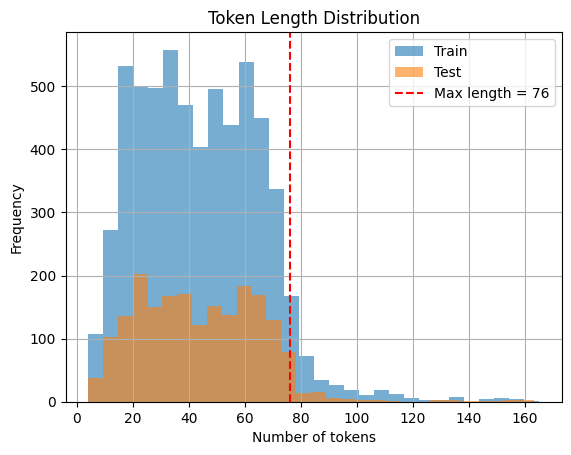

In [11]:
from datasets import Dataset
from transformers import AutoTokenizer
import matplotlib.pyplot as plt

train_dataset = Dataset.from_pandas(train_df[['Text', 'label']])
test_dataset = Dataset.from_pandas(test_df[['Text', 'label']])

tokenizer = AutoTokenizer.from_pretrained("neuralmind/bert-base-portuguese-cased")

train_token_lengths = train_df['Text'].apply(lambda x: len(tokenizer.tokenize(x)))
test_token_lengths = test_df['Text'].apply(lambda x: len(tokenizer.tokenize(x)))

print("Train token length stats:")
print(train_token_lengths.describe())
print("\nTest token length stats:")
print(test_token_lengths.describe())

suggested_max_len = int(train_token_lengths.quantile(0.95))
print(f"\nSuggested max_length (95th percentile): {suggested_max_len}")

plt.hist(train_token_lengths, bins=30, alpha=0.6, label='Train')
plt.hist(test_token_lengths, bins=30, alpha=0.6, label='Test')
plt.axvline(suggested_max_len, color='red', linestyle='--', label=f'Max length = {suggested_max_len}')
plt.title("Token Length Distribution")
plt.xlabel("Number of tokens")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

In [12]:
def tokenize_function(example):
    return tokenizer(example['Text'], truncation=True, padding='max_length', max_length=74)

train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

Map: 100%|██████████| 1999/1999 [00:00<00:00, 39478.36 examples/s]


In [13]:
from transformers.models.modernbert import ModernBertForSequenceClassification

model = ModernBertForSequenceClassification.from_pretrained(
    './modernbert-br/checkpoint-60000',
    num_labels=len(label2id),
    id2label=id2label,
    label2id=label2id
)

Some weights of ModernBertForSequenceClassification were not initialized from the model checkpoint at ./modernbert-br/checkpoint-60000 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [14]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=64,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    tokenizer=tokenizer,
)

trainer.train()

/tmp/ipykernel_1328790/3930846734.py:13: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss
10,0.735800
20,0.677700
30,0.687300
40,0.663200
50,0.670900
60,0.643600
70,0.649400
80,0.621500
90,0.612600
100,0.621700


TrainOutput(global_step=282, training_loss=0.5790607328956009, metrics={'train_runtime': 75.3084, 'train_samples_per_second': 238.858, 'train_steps_per_second': 3.745, 'total_flos': 885911831886816.0, 'train_loss': 0.5790607328956009, 'epoch': 3.0})

In [15]:
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Get predictions for test dataset
predictions = trainer.predict(test_dataset)
pred_labels = np.argmax(predictions.predictions, axis=1)
true_labels = test_dataset['label']

# Calculate and print accuracy
accuracy = accuracy_score(true_labels, pred_labels)
print(f"\nAccuracy: {accuracy:.4f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(true_labels, pred_labels, target_names=list(label2id.keys())))



Accuracy: 0.6683

Classification Report:
              precision    recall  f1-score   support

     against       0.67      0.66      0.66       995
         for       0.67      0.68      0.67      1004

    accuracy                           0.67      1999
   macro avg       0.67      0.67      0.67      1999
weighted avg       0.67      0.67      0.67      1999



In [16]:
from transformers.models.bert import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained(
    './bert-br/checkpoint-75000',
    num_labels=len(label2id),
    id2label=id2label,
    label2id=label2id
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at ./bert-br/checkpoint-75000 and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [17]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=64,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    tokenizer=tokenizer,
)

trainer.train()

/tmp/ipykernel_1328790/3930846734.py:13: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss
10,0.676200
20,0.607000
30,0.600400
40,0.566200
50,0.568900
60,0.571000
70,0.531200
80,0.500000
90,0.527200
100,0.495500


TrainOutput(global_step=282, training_loss=0.44310862903899334, metrics={'train_runtime': 55.0684, 'train_samples_per_second': 326.648, 'train_steps_per_second': 5.121, 'total_flos': 684043521723360.0, 'train_loss': 0.44310862903899334, 'epoch': 3.0})

In [18]:
# Get predictions for test dataset
predictions = trainer.predict(test_dataset)
pred_labels = np.argmax(predictions.predictions, axis=1)
true_labels = test_dataset['label']

# Calculate and print accuracy
accuracy = accuracy_score(true_labels, pred_labels)
print(f"\nAccuracy: {accuracy:.4f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(true_labels, pred_labels, target_names=list(label2id.keys())))


Accuracy: 0.7899

Classification Report:
              precision    recall  f1-score   support

     against       0.80      0.76      0.78       995
         for       0.78      0.82      0.80      1004

    accuracy                           0.79      1999
   macro avg       0.79      0.79      0.79      1999
weighted avg       0.79      0.79      0.79      1999

